In [ ]:
from matplotlib.patches import Patch
from collections import defaultdict
from __future__ import annotations
import matplotlib.pyplot as plt
import gymnasium as gym
from tqdm import tqdm
import seaborn as sns
import numpy as np


env = gym.make("Blackjack-v1", sab=True)

In [6]:
class BlackjackAgent:

    def __init__(self, env: gym.Env):
        self.env = env

    def get_action(self, obs: tuple[int, int, bool]) -> int:
        """
        Returns the best action with probability (1 - epsilon)
        otherwise a random action with probability epsilon to ensure exploration.
        """
        player_total = obs[0]
        dealer_card = obs[1]
        useable_ace = obs[2]
        
        if player_total <= 11:
            return 1
        
        if useable_ace:
            if player_total <= 17:
                return 1
            elif player_total == 18 and dealer_card >= 9:
                return 1
        
        else:
            if player_total <= 16 and dealer_card >= 7:
                return 1
            elif player_total == 12 and dealer_card <= 3:
                return 1
        return 0

In [8]:
class BlackjackAgentBaldwin:

    def __init__(self, env: gym.Env):
        self.env = env

    def get_action(self, obs: tuple[int, int, bool]) -> int:
        """
        Returns the best action with probability (1 - epsilon)
        otherwise a random action with probability epsilon to ensure exploration.
        """
        player_total = obs[0]
        dealer_card = obs[1]
        useable_ace = obs[2]
        
        if player_total <= 11:
            return 1
        
        if useable_ace:
            if player_total <= 17:
                return 1
            elif player_total == 18 and (dealer_card >= 7 or dealer_card == 1):
                return 1
        
        else:
            if player_total == 12 and (dealer_card <= 3 or dealer_card >= 7):
                return 1
            elif player_total <= 16 and (dealer_card >= 7 or dealer_card == 1):
                return 1
        return 0

In [9]:
agent = BlackjackAgentBaldwin(env)

In [ ]:
won = 0
n_eval_episodes = 960_400

for _ in range(n_eval_episodes):
    obs, info = env.reset()
    done = False
    while not done:
        action = agent.get_action(obs)  # Greedy policy
        obs, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
    if reward == 1:
        won+=1

print(f"Win rate: {(won / n_eval_episodes)*100}")

Win rate: 43.29547


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create the policy matrix, for sums 12-21, dealer card 1-10, usable ace = No
policy = np.zeros((11, 10))
for player_sum in range(11, 22):
    for dealer_card in range(1, 11):
        policy[player_sum - 11, dealer_card - 1] = agent.get_action((player_sum, dealer_card, False))
# Make it a df with the right index and columns
policy = pd.DataFrame(policy, index=range(11, 22), columns=range(1, 11))

# Reindexing
# Rename column 1 to 'A'
policy.rename(columns={1: 'A'}, inplace=True)

# Reordering columns and rows
columns_order = [col for col in policy.columns if col != 'A'] + ['A']
rows_order = range(21, 10, -1)
policy = policy.reindex(rows_order)
policy = policy[columns_order]

# Create annotation DataFrame with 'H' and 'S'
annot_df = policy.replace({0.0: 'S', 1.0: 'H'})


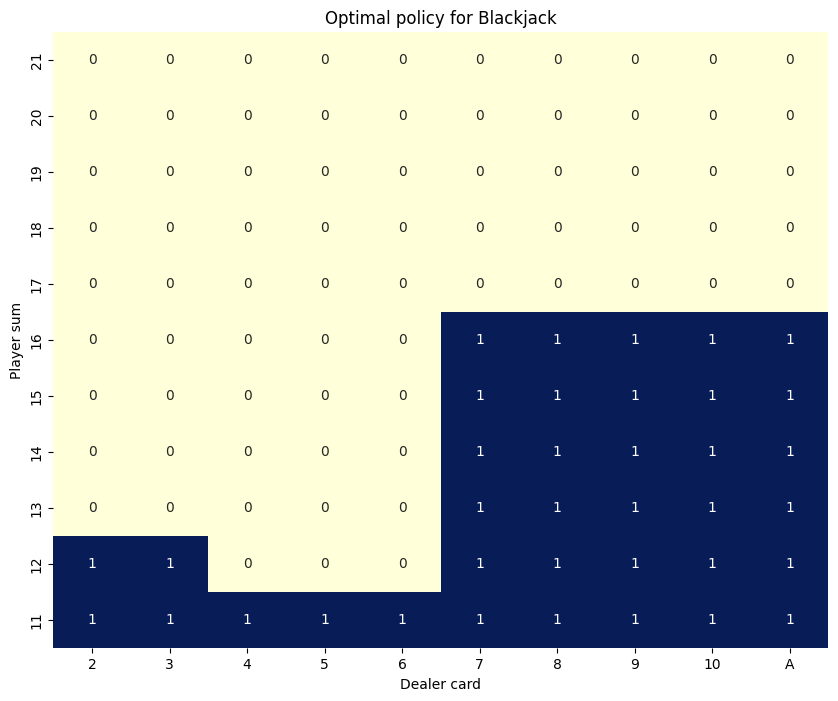

In [13]:
# Plot the policy
plt.figure(figsize=(10, 8))
sns.heatmap(policy, cmap="YlGnBu", annot=True, fmt="g", cbar=False)
plt.xlabel("Dealer card")
plt.ylabel("Player sum")
plt.title("Optimal policy for Blackjack")
plt.show()

In [14]:
#write to csv
annot_df.to_csv("policies/hard/optimal.csv")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create the policy matrix, for sums 12-21, dealer card 1-10, usable ace = No
policy = np.zeros((11, 10))
for player_sum in range(11, 22):
    for dealer_card in range(1, 11):
        policy[player_sum - 11, dealer_card - 1] = agent.get_action((player_sum, dealer_card, True))
# Make it a df with the right index and columns
policy = pd.DataFrame(policy, index=range(11, 22), columns=range(1, 11))

# Reindexing
# Rename column 1 to 'A'
policy.rename(columns={1: 'A'}, inplace=True)

# Reordering columns and rows
columns_order = [col for col in policy.columns if col != 'A'] + ['A']
rows_order = range(21, 10, -1)
policy = policy.reindex(rows_order)
policy = policy[columns_order]

# Create annotation DataFrame with 'H' and 'S'
annot_df = policy.replace({0.0: 'S', 1.0: 'H'})


In [16]:
#write to csv
annot_df.to_csv("policies/soft/optimal.csv")

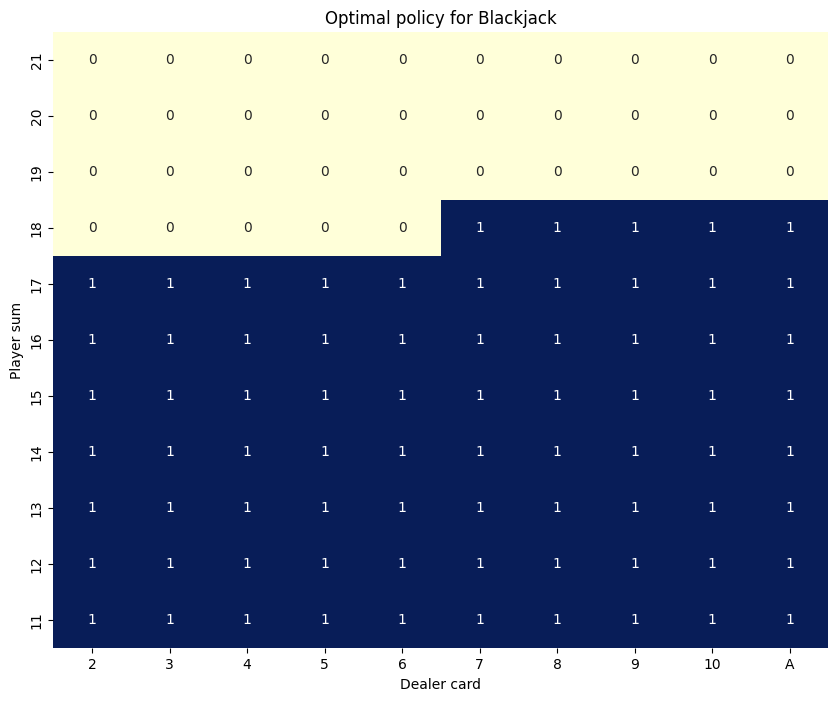

In [17]:
# Plot the policy
plt.figure(figsize=(10, 8))
sns.heatmap(policy, cmap="YlGnBu", annot=True, fmt="g", cbar=False)
plt.xlabel("Dealer card")
plt.ylabel("Player sum")
plt.title("Optimal policy for Blackjack")
plt.show()